In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *

In [2]:
XCr_path

'/global/cscratch1/sd/krzywins/CrystalBPM5/crystal-fft-bpm/examples/../'

In [3]:

def single_realization_with_data(delta_theta):
    
    xcr = XCrystal(XCr_path+'/config/C400_9p8keV_waist_3p5_micron.yaml')
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [4]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(15e-6)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Forest-Ruth
Initialized tools...
Delta theta:  1.5e-05 ; Reflectivity:  0.4653825581281255 ; Transmission:  0.45382428307415706


In [5]:
U1_xyz.shape

(1, 1000, 3, 433)

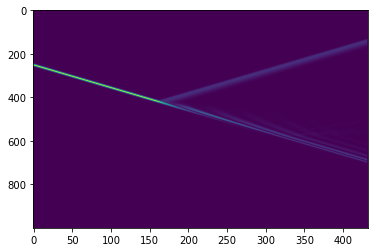

In [6]:
plt.imshow(np.abs(U1_xyz[0,:,1,:]**2 + U2_xyz[0,:,1,:]**2), aspect='auto')